## Etapa 1: Instando o TensorFlow e Keras

In [ ]:
!pip install tensorflow
!pip install keras

## Etapa 2: Importando as bibliotecas

In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical

from matplotlib import pyplot as plt

## Etapa 3: Pré-processamento

### Carregando a base de dados MNIST

In [4]:
# Carregando a base de dados
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
#Pegando os dados de treino e teste do dataset

def load_data():

    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

    # Tornando os valores dos pixels entre 1. e 0.
    x_train = x_train / 255
    x_test = x_test / 255

    # Categorizando cada valor de label de acordo com um valor one hot.
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return x_train, y_train, x_test, y_test


x_train, y_train, x_test, y_test = load_data()

In [ ]:
x_train[0]

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_test.shape

(10000, 28, 28, 1)

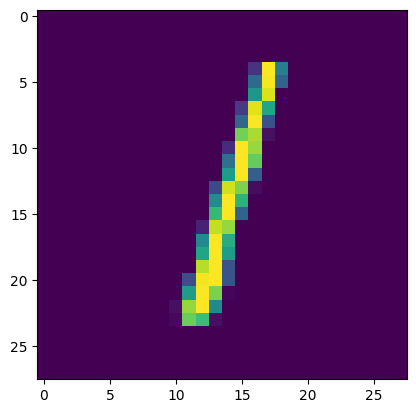

In [9]:
plt.imshow(x_test[2])

## Etapa 4: Construindo a Rede Neural Convolucional

### Definindo o modelo

In [10]:
#model = tf.keras.models.Sequential()
filename = 'modelo1.h5'

# pegando a quantidade de classes do dataset
num_classes = y_test.shape[1]

#Criando o modelo
model = Sequential()

### Adicionado a primeira camada de convolução

Hyper-parâmetros da camada de convolução:
- filters (filtros): 32
- kernel_size (tamanho do kernel): 3
- padding (preenchimento): same
- função de ativação: relu
- input_shape (camada de entrada): (32, 32, 3)


In [11]:
model.add(Conv2D(filters=30, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Adicionando a camada de max-pooling e a segunda camada de convolução

Hyper-parâmetros da camada de max-pooling:
- pool_size: 2
- strides: 2
- padding: valid

Hyper-parâmetros da camada de convolução:
- filters (filtros): 32
- kernel_size (tamanho do kernel):3
- padding (preenchimento): same
- função de ativação: relu


In [12]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [13]:
model.add(Conv2D(filters=15, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))

### Adicionando a segunda camada de max-pooling

Hyper-parâmetros da camada de convolução:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu


In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))

###  Adicionando uma camada de Dropout

Hyper-parâmetros da camada de convolução:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu


In [15]:
model.add(Dropout(0.2))

### Adicionando a camada de flattening

In [16]:
model.add(Flatten())

### Adicionando três camadas densas (fully-connected)

Hyper-parâmetros da 1° camada densa:
- units/neurônios: 128
- função de ativação: relu

Hyper-parâmetros da 2° camada densa:
- units/neurônios: 64
- função de ativação: relu

Hyper-parâmetros da 3° camada densa:
- units/neurônios: 32
- função de ativação: relu

In [17]:
model.add(Dense(units = 128, activation='relu'))

In [18]:
model.add(Dense(units = 64, activation='relu'))

In [19]:
model.add(Dense(units = 32, activation='relu'))

### Adicionando a camada de saída

Hyper-parâmetros da camada de saída:

 - units/neurônios: 10 (número de classes)
 - activation: softmax


In [20]:
model.add(Dense(units=num_classes, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 375)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        48,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,639 (248.59 KB)

 Trainable params: 63,639 (248.59 KB)

 Non-trainable params: 0 (0.00 B)

### Compilando o modelo

#### sparse_categorical_accuracy

In [22]:
# 0 0 0 1 0 0 0 0 0 0
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [23]:
#model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

### Treinando o modelo

In [24]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8529 - loss: 0.4493
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9776 - loss: 0.0697
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9844 - loss: 0.0483
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9874 - loss: 0.0419
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9879 - loss: 0.0391
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9897 - loss: 0.0327
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9905 - loss: 0.0301
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9910 - loss: 0.0283
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9925 - loss: 0.0243
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0216
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9932 - loss: 0.0206
Epoch 12/20
1875/1875 ━━━━━

### Avaliando o modelo

In [25]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9913 - loss: 0.0312


In [26]:
print("Acurácia de Teste: {}".format(test_accuracy))
print("\nAcurácia em porcentagem: %.2f%%" % (test_accuracy*100))

Acurácia de Teste: 0.992900013923645

Acurácia em porcentagem: 99.29%


In [28]:
print("Perda de Teste: {}".format(test_loss))
print("\nPerda em porcentagem: %.2f%%" % (test_loss*100))

Perda de Teste: 0.02579599618911743

Perda em porcentagem: 2.58%
